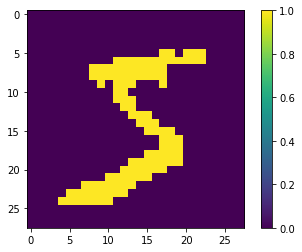

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


threshold = True

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize dataset
# source: https://www.tensorflow.org/quantum/tutorials/mnist
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0

#    apply threshold
if threshold:
    black_or_white = np.vectorize(lambda x : 0 if x < 0.5 else 1)
    x_train = black_or_white(x_train)
    x_test = black_or_white(x_test)
# x_test = black_or_white(x_test)

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()
plt.show()

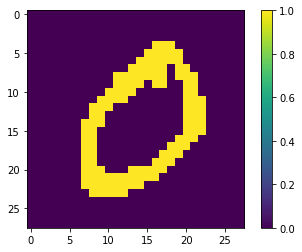

In [2]:
plt.imshow(x_train[1, :, :, 0])
plt.colorbar()
plt.show()

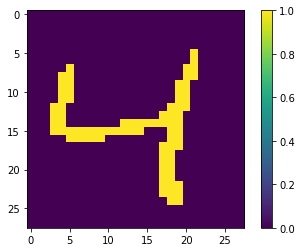

In [3]:
plt.imshow(x_train[2, :, :, 0])
plt.colorbar()
plt.show()

There is not a big different between 0.4, 0.5, 0.6 

In [4]:
x_train[:, :, :, 0].shape

(60000, 28, 28)

In [5]:
import pandas as pd

df_train = pd.DataFrame( x_train[:, :, :, 0].reshape(x_train[:, :, :, 0].shape[0], 28*28))
df_train["label"] = y_train
df_train["train_or_test"] = "train"
df_test = pd.DataFrame( x_test[:, :, :, 0].reshape(x_test[:, :, :, 0].shape[0], 28*28))
df_test["train_or_test"] = "test"
df_test["label"] = y_test

df = pd.concat([df_train, df_test])
df.reset_index(inplace=True, drop=True)

In [6]:
# those that are all 0
df.drop(df.columns[df.sum()==0], axis=1)

,13,14,34,35,36,37,38,39,40,41,...,771,772,773,774,775,776,777,778,label,train_or_test
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,train
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,test
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,test
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,test
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,test
